# Read in Data and Set up Packages

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur

%precision 2

'%.2f'

In [2]:
#load files
file = ur.open("roottrees/muminus_0-2GeV_isotropic_sbnd_ana.root")
file_sce = ur.open("roottrees/muminus_0-2GeV_isotropic_sbnd_ana_sce.root")
anatree = file["analysistree"]["anatree"]
anatree_sce = file_sce["analysistree"]["anatree"]
pandora_branches = ["trkend[xyz]_pandoraTrack","trkstart[xyz]_pandoraTrack","trkdqdx_pandoraTrack","trkdedx_pandoraTrack","trkxyz_pandoraTrack"]

## Endpoint study
### Are the endpoints really the endpoints? 
### Are startpoints mistaken as endpoints?
I am concerned about how it is exactly that pandora discerns the startpoints and endpoints. I would image that more endpoints would be closer to the boundaries of the TPC. 

# SCE Study
## Recreate plots from SCE paper


<img src="images/SCEcosmicdistribution.png">

In [16]:
def nearbdry(y, tolerance=50):
    dy = abs(abs(y)-200)
    if (dy < tolerance):
        return True
    else:
        return False
    
    
ztol = [0,500]
    
xxs = []
yys = []
xxe = []
yye = []
nRecotracks = np.zeros(10)
lens = np.zeros(10)
total = 0
for run,data in enumerate(anatree.iterate(pandora_branches)):
    for subrun,(x,y,z) in enumerate(zip(data[b'trkendx_pandoraTrack'],data[b'trkendy_pandoraTrack'],data[b'trkendz_pandoraTrack'])):
        nRecotracks[len(x)] += 1
        if (len(x) == 1): #just the best reconstructed one
            if ( (z >= ztol[0]) and (z < ztol[1])): #slice some amount of z
                #if (nearbdry(y) and (abs(abs(x)-200) > 2)):
                #project this slice in x-y axis (if close to edge)
                xxe.append(x)
                yye.append(y)
    for subrun,(x,y,z) in enumerate(zip(data[b'trkstartx_pandoraTrack'],data[b'trkstarty_pandoraTrack'],data[b'trkstartz_pandoraTrack'])):
        if (len(x) == 1): #just the best reconstructed one
            if ( (z >= ztol[0]) and (z < ztol[1])): #slice some amount of z
                #if (nearbdry(y) and (abs(abs(x)-200) > 2)):
                #project this slice in x-y axis (if close to edge)
                xxs.append(x)
                yys.append(y)
                
xxs_sce = []
yys_sce = []
xxe_sce = []
yye_sce = []
nRecotracks_sce = np.zeros(10)
for run,data in enumerate(anatree_sce.iterate(pandora_branches)):
    for subrun,(x,y,z) in enumerate(zip(data[b'trkendx_pandoraTrack'],data[b'trkendy_pandoraTrack'],data[b'trkendz_pandoraTrack'])):
        nRecotracks_sce[len(x)] += 1
        if (len(x) == 1): #just the best reconstructed one
            if ( (z >= ztol[0]) and (z < ztol[1])): #slice some amount of z
                #if (nearbdry(y) and (abs(abs(x)-200) > 2)):
                #project this slice in x-y axis (if close to edge)
                xxe_sce.append(x)
                yye_sce.append(y)
    for subrun,(x,y,z) in enumerate(zip(data[b'trkstartx_pandoraTrack'],data[b'trkstarty_pandoraTrack'],data[b'trkstartz_pandoraTrack'])):
        if (len(x) == 1): #just the best reconstructed one
            if ( (z >= ztol[0]) and (z < ztol[1])): #slice some amount of z
                #project this slice in x-y axis (if close to edge)
                xxs_sce.append(x)
                yys_sce.append(y)


In [20]:
nTotRecotracks = np.sum(nRecotracks)
nTotRecotracks_sce = np.sum(nRecotracks_sce)
print(nTotRecotracks,nTotRecotracks_sce)
print(nRecotracks[1],nRecotracks_sce[1])

9700.0 9700.0
7689.0 7690.0


Num tracks, non-SCE
1023.0
7689.0
965.0
19.0
2.0
1.0
1.0
0.0
0.0
0.0
Num tracks, SCE
1016.0
7690.0
965.0
25.0
3.0
1.0
0.0
0.0
0.0
0.0


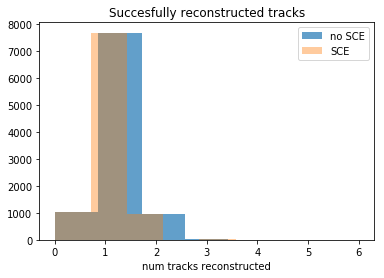

<Figure size 432x288 with 0 Axes>

In [48]:
ref = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15]]

tracks = []
print("Num tracks, non-SCE")
for i,t in enumerate(nRecotracks):
    print(t)
    tracks += ref[i]*int(t)
    
tracks_sce = []
print("Num tracks, SCE")
for i,t in enumerate(nRecotracks_sce):
    print(t)
    tracks_sce += ref[i]*int(t)

plt.hist(tracks, bins=7, label='no SCE', alpha=.7)
plt.hist(tracks_sce, bins=7, label='SCE', alpha=.4)
plt.xlabel('num tracks reconstructed')
plt.title('Succesfully reconstructed tracks')
plt.legend()
plt.show()
plt.savefig('nRecoTrackshistcomp.png')

In [118]:
print(nRecotracks[1])
print(nRecotracks[1])

7689.0
7689.0


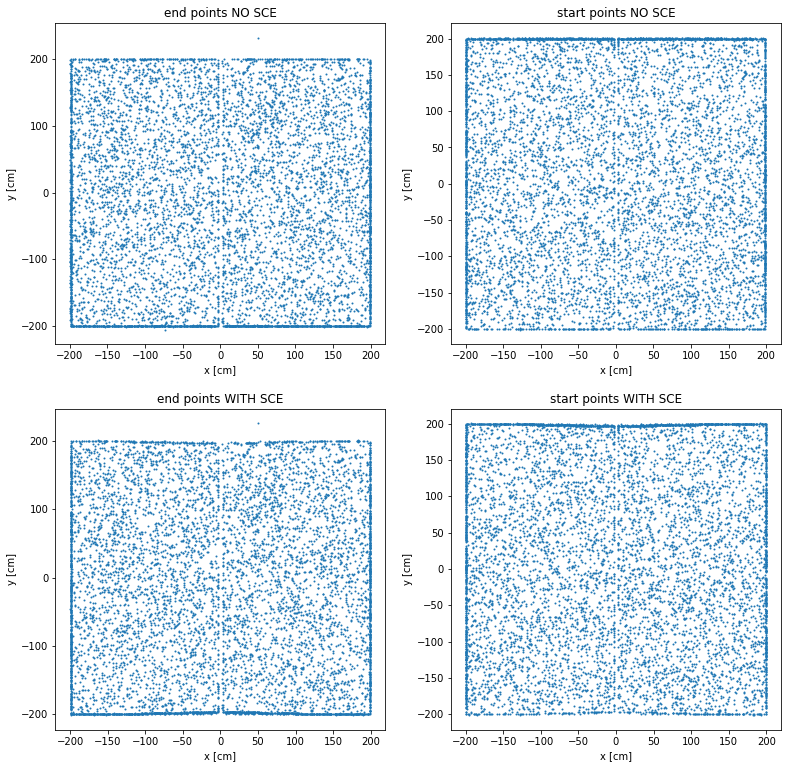

In [109]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(13,13)
axes[0,0].scatter(xxe,yye, s=1) #regular
axes[0,0].set_title('end points NO SCE')
axes[0,0].set_xlabel('x [cm]')
axes[0,0].set_ylabel('y [cm]')

axes[0,1].scatter(xxs,yys, s=1) #w/ SCE
axes[0,1].set_title('start points NO SCE')
axes[0,1].set_xlabel('x [cm]')
axes[0,1].set_ylabel('y [cm]')

axes[1,0].scatter(xxe_sce,yye_sce, s=1) #compare
axes[1,0].set_title('end points WITH SCE')
axes[1,0].set_xlabel('x [cm]')
axes[1,0].set_ylabel('y [cm]')

axes[1,1].scatter(xxs_sce, yys_sce, s=1)
axes[1,1].set_title('start points WITH SCE')
axes[1,1].set_xlabel('x [cm]')
axes[1,1].set_ylabel('y [cm]')

fig.savefig('trackendpoints4x4_fullz.png')

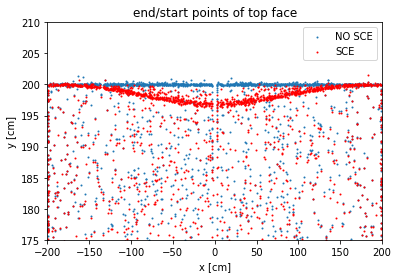

In [110]:
# xxe = np.array(xxe)
# yye = np.array(yye)
# xxs = np.array(xxs)
# yys = np.array(yys)
# xxe_sce = np.array(xxe_sce)
# yye_sce = np.array(yye_sce)
# xxs_sce = np.array(xxs_sce)
# yys_sce = np.array(yys_sce)

plt.scatter(xxs+xxe,yys+yye,s=1,label='NO SCE')
plt.scatter(xxs_sce+xxe_sce,yys_sce+yye_sce,s=1,c='red',label='SCE')
plt.title('end/start points of top face')
plt.legend()
plt.xlim([-200,200])
plt.ylim([175,210])
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.savefig('endpoints_topface_fullz.png')

In [4]:
#useful functions for analysis below

#is the point inside the detector
def in_AV(xx,yy,zz):
    if (abs(xx) >= 205) or (abs(yy) >= 205) or zz <= -5 or zz >= 505:
        print("outside AV: {},{},{}".format(xx,yy,zz))
        return False
    else:
        return True

#translate spatial coordinate to voxel coordinate 
def get_voxindices(xx,yy,zz):
    indexx = int((endx[0]+Lx/2)*nVoxx/Lx)
    indexy = int((endy[0]+Ly/2)*nVoxy/Ly)
    indexz = int(endz[0]*nVoxz/Lz)
    if (indexx >= nVoxx):
        indexx = nVoxx - 1
    elif (indexx < 0):
        indexx = 0
    if (indexy >= nVoxy):
        indexy = nVoxy - 1
    elif (indexy < 0):
        indexy = 0
    if (indexz >= nVoxz):
        indexz = nVoxz - 1
    elif (indexz < 0):
        indexz = 0
    return indexx,indexy,indexz

In [41]:
for key in anatree.keys():
    if "_pandoraTrack" in str(key):
        print(key)
        

b'ntracks_pandoraTrack'
b'trkId_pandoraTrack'
b'trkncosmictags_tagger_pandoraTrack'
b'trkcosmicscore_tagger_pandoraTrack'
b'trkcosmictype_tagger_pandoraTrack'
b'trkncosmictags_flashmatch_pandoraTrack'
b'trkcosmicscore_flashmatch_pandoraTrack'
b'trkcosmictype_flashmatch_pandoraTrack'
b'trkke_pandoraTrack'
b'trkrange_pandoraTrack'
b'trkidtruth_recoutils_totaltrueenergy_pandoraTrack'
b'trkidtruth_recoutils_totalrecocharge_pandoraTrack'
b'trkidtruth_recoutils_totalrecohits_pandoraTrack'
b'trkidtruth_pandoraTrack'
b'trkorigin_pandoraTrack'
b'trkpdgtruth_pandoraTrack'
b'trkefftruth_pandoraTrack'
b'trksimIDEenergytruth_pandoraTrack'
b'trksimIDExtruth_pandoraTrack'
b'trksimIDEytruth_pandoraTrack'
b'trksimIDEztruth_pandoraTrack'
b'trkpurtruth_pandoraTrack'
b'trkpitchc_pandoraTrack'
b'ntrkhits_pandoraTrack'
b'trkdedx_pandoraTrack'
b'trkdqdx_pandoraTrack'
b'trkresrg_pandoraTrack'
b'trkxyz_pandoraTrack'
b'trkstartx_pandoraTrack'
b'trkstarty_pandoraTrack'
b'trkstartz_pandoraTrack'
b'trkstartd_pando

In [ ]:

elim = 5
for i,data in enumerate(anatree.iterate(["trkresrg_pandoraTrack","trkdqdx_pandoraTrack","event"])):
    for ii,(rr,dqdx,e) in enumerate(zip(data[b'trkresrg_pandoraTrack'],data[b'trkdqdx_pandoraTrack'],data[b'event'])):
        if (dqdx.shape[0] == 1):
            if (e <= elim):
                rrange = []
                dqdxs = []
                for iii,val in enumerate(dqdx[0][0][dqdx[0][0] != 0]):
                    rrange.append(rr[0][0][iii])
                    dqdxs.append(val)
                plt.plot(rrange,dqdxs,c='b')
            elif (e > esel):
                break
                
for i,data in enumerate(anatree_sce.iterate(["trkresrg_pandoraTrack","trkdqdx_pandoraTrack","event"])):
    for ii,(rr,dqdx,e) in enumerate(zip(data[b'trkresrg_pandoraTrack'],data[b'trkdqdx_pandoraTrack'],data[b'event'])):
        if (dqdx.shape[0] == 1):
            if (e <= elim):
                rrange_sce = []
                dqdxs_sce = []
                for iii,val in enumerate(dqdx[0][0][dqdx[0][0] != 0]):
                    rrange_sce.append(rr[0][0][iii])
                    dqdxs_sce.append(val)
                plt.plot(rrange_sce,dqdxs_sce,c='r')
            elif (e > elim):
                break
                
plt.title('dQ/dx vs Resiudal range for several tracks')
                


#### This little test proves that the first index of the 3-dimensional vars is the number of tracks
trkdqdx_pandoraTrack.shape = (#,3,2000)

```
for run,data in enumerate(anatree.iterate(['trkxyz_pandoraTrack','trkstartx_pandoraTrack'])):
    for (xyz,start) in zip(data[b'trkxyz_pandoraTrack'],data[b'trkstartx_pandoraTrack']):
        if (xyz.shape[0] != start.shape[0]):
            print(xyz.shape)
```
output: nothing

#### This test proves that the second index is always 3 (maybe because three wire planes)
```
for run,data in enumerate(anatree.iterate(['trkxyz_pandoraTrack','trkstartx_pandoraTrack'])):
    for (xyz,start) in zip(data[b'trkxyz_pandoraTrack'],data[b'trkstartx_pandoraTrack']):
        if (xyz.shape[1] != 3):
            print(xyz.shape)
```
output: nothing


In [115]:
count = 0
for run,data in enumerate(anatree.iterate(['trkxyz_pandoraTrack','trkdqdx_pandoraTrack'])):
    for subrun,(xyz,dqdx) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if xyz.shape[0] == 1:
            if np.count_nonzero(xyz[0][0]) != 3 * np.count_nonzero(dqdx[0][0]):
#                 print(run,subrun,np.count_nonzero(xyz[0][0]),np.count_nonzero(dqdx[0][0]))
                continue
            else:
                count += 1
                print(count, np.count_nonzero(xyz[0][0]), np.count_nonzero(dqdx[0][0]))
                
            

1 105 35
2 282 94
3 336 112
4 1395 465
5 1869 623
6 633 211
7 1314 438
8 537 179
9 399 133
10 1089 363
11 135 45
12 801 267
13 747 249
14 519 173
15 1530 510
16 417 139
17 1593 531
18 24 8
19 96 32
20 762 254
21 21 7
22 1206 402
23 459 153
24 1866 622
25 1068 356
26 1479 493
27 807 269
28 609 203
29 48 16
30 528 176
31 654 218
32 141 47
33 72 24
34 1590 530
35 435 145
36 315 105
37 1971 657
38 588 196
39 390 130
40 135 45
41 51 17
42 606 202
43 411 137
44 276 92
45 90 30
46 171 57
47 492 164
48 1662 554
49 66 22
50 1086 362
51 201 67
52 765 255
53 309 103
54 249 83
55 264 88
56 642 214
57 483 161
58 396 132
59 918 306
60 465 155
61 1707 569
62 1224 408
63 45 15
64 852 284
65 645 215
66 114 38
67 42 14
68 1194 398
69 84 28
70 333 111
71 129 43
72 1191 397
73 549 183
74 78 26
75 678 226
76 165 55
77 1707 569
78 1059 353
79 528 176
80 144 48
81 753 251
82 801 267
83 66 22
84 471 157
85 75 25
86 741 247
87 624 208
88 1647 549
89 426 142
90 1410 470
91 741 247
92 1143 381
93 1563 521
94 108

707 150 50
708 36 12
709 24 8
710 1530 510
711 1230 410
712 642 214
713 45 15
714 24 8
715 81 27
716 741 247
717 201 67
718 507 169
719 1614 538
720 30 10
721 57 19
722 12 4
723 18 6
724 24 8
725 198 66
726 957 319
727 33 11
728 432 144
729 15 5
730 933 311
731 141 47
732 189 63
733 495 165
734 159 53
735 441 147
736 636 212
737 210 70
738 861 287
739 804 268
740 1923 641
741 1578 526
742 678 226
743 150 50
744 75 25
745 225 75
746 153 51
747 330 110
748 144 48
749 87 29
750 807 269
751 327 109
752 495 165
753 438 146
754 48 16
755 1602 534
756 39 13
757 159 53
758 663 221
759 450 150
760 60 20
761 1416 472
762 159 53
763 666 222
764 1311 437
765 375 125
766 36 12
767 1083 361
768 1380 460
769 108 36
770 1107 369
771 39 13
772 1947 649
773 534 178
774 642 214
775 1380 460
776 273 91
777 165 55
778 669 223
779 720 240
780 396 132
781 939 313
782 66 22
783 570 190
784 1029 343
785 1536 512
786 1437 479
787 1239 413
788 372 124
789 1023 341
790 1338 446
791 372 124
792 405 135
793 177 59


KeyboardInterrupt: 

In [55]:
# set up voxel map parameters
nVoxx, nVoxy, nVoxz = 40,40,50
Lx, Ly, Lz = 400.0,400.0,500.0 #cm
grid_nhits = np.zeros([nVoxx,nVoxy,nVoxz], dtype='int8')
grid_dqdx = np.zeros([nVoxx,nVoxy,nVoxz], dtype='int64')
grid_nhits_sce = np.zeros([nVoxx,nVoxy,nVoxz], dtype='int8')
grid_dqdx_sce = np.zeros([nVoxx,nVoxy,nVoxz], dtype='int64')

nVoxx12, nVoxy12, nVoxz12 = 12,12,15
grid_nhits12 = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int8')
grid_dqdx12 = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int64')
grid_nhits12_sce = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int8')
grid_dqdx12_sce = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int64')

#fill out voxel grids
#for dqdx (trkxyz gives info about the coordinates of each reconstructed hit)
wplane = 0
count = 0
for run,data in enumerate(anatree.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            if np.count_nonzero(xyz[0][wplane]) == 3 * np.count_nonzero(dqdxs[0][wplane]):
                #x,y,z are in voxel coordinates
                x,y,z = 0,0,0
                xx,yy,zz = 0,0,0
                for c,coord in enumerate(xyz[0][wplane][xyz[0][wplane]!=0]):
                    if ( (c%3) == 0 ):
                        x = int((coord+200)*(nVoxx-1)/Lx)
                        xx = int((coord+200)*(nVoxx12-1)/Lx)
                    elif ( (c%3) == 1 ):
                        y = int((coord+200)*(nVoxy-1)/Ly)
                        yy = int((coord+200)*(nVoxy12-1)/Ly)
                    elif ( (c%3) == 2 ):
                        z = int(coord*(nVoxz-1)/Lz)
                        zz = int(coord*(nVoxz12-1)/Lz)
                        if ( x >= nVoxx ):
                            x = nVoxx - 1
                            print('0')
                        elif ( x < 0 ):
                            x = 0
                            print('1')
                        if ( y >= nVoxy ):
                            y = nVoxy - 1
                            print(2)
                        elif ( y < 0 ):
                            y = 0
                            print(3)
                        if ( z >= nVoxz ):
                            z = nVoxz - 1
                            print(4)
                        elif ( z < 0 ):
                            z = 0
                            print(5)
                        grid_nhits[x][y][z] += 1
                        grid_dqdx[x][y][z] += dqdxs[0][wplane][int(c/3)]
                        grid_nhits12[xx][yy][zz] += 1
                        grid_dqdx12[xx][yy][zz] += dqdxs[0][wplane][int(c/3)]
                        x,y,z = 0,0,0
                        xx,yy,zz = 0,0,0
                        count += 1
                    else:
                        print("huh...")
                        
print("We saw {} hits".format(count))

count_sce = 0
for run,data in enumerate(anatree_sce.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            if np.count_nonzero(xyz[0][wplane]) == 3 * np.count_nonzero(dqdxs[0][wplane]):
                #x,y,z are in voxel coordinates
                x,y,z = 0,0,0
                xx,yy,zz = 0,0,0
                for c,coord in enumerate(xyz[0][wplane][xyz[0][wplane]!=0]):
                    if ( (c%3) == 0 ):
                        x = int((coord+200)*(nVoxx-1)/Lx)
                        xx = int((coord+200)*(nVoxx12-1)/Lx)
                    elif ( (c%3) == 1 ):
                        y = int((coord+200)*(nVoxy-1)/Ly)
                        yy = int((coord+200)*(nVoxy12-1)/Ly)
                    elif ( (c%3) == 2 ):
                        z = int(coord*(nVoxz-1)/Lz)
                        zz = int(coord*(nVoxz12-1)/Lz)
                        if ( x >= nVoxx ):
                            x = nVoxx - 1
                            print('0')
                        elif ( x < 0 ):
                            x = 0
                            print('1')
                        if ( y >= nVoxy ):
                            y = nVoxy - 1
                            print(2)
                        elif ( y < 0 ):
                            y = 0
                            print(3)
                        if ( z >= nVoxz ):
                            z = nVoxz - 1
                            print(4)
                        elif ( z < 0 ):
                            z = 0
                            print(5)
                        grid_nhits_sce[x][y][z] += 1
                        grid_dqdx_sce[x][y][z] += dqdxs[0][wplane][int(c/3)]
                        grid_nhits12_sce[xx][yy][zz] += 1
                        grid_dqdx12_sce[xx][yy][zz] += dqdxs[0][wplane][int(c/3)]
                        x,y,z = 0,0,0
                        xx,yy,zz = 0,0,0
                        count_sce += 1
                    else:
                        print("huh...")
                    
print("We saw {} sce hits".format(count_sce))

4
4
We saw 1459150 hits
4
We saw 1459591 sce hits


In [105]:
nVoxx12, nVoxy12, nVoxz12 = 12,12,15
grid_nhits12 = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int64')
grid_dqdx12 = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int64')
grid_nhits12_sce = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int64')
grid_dqdx12_sce = np.zeros([nVoxx12,nVoxy12,nVoxz12], dtype='int64')

wplane = 0
count = 0
for run,data in enumerate(anatree.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            if np.count_nonzero(xyz[0][wplane]) == 3 * np.count_nonzero(dqdxs[0][wplane]):
                #x,y,z are in voxel coordinates
                xx,yy,zz = 0,0,0
                for c,coord in enumerate(xyz[0][wplane][xyz[0][wplane]!=0]):
                    if ( (c%3) == 0 ):
                        xx = int((coord+200.0)*(nVoxx12-1)/Lx)
                    elif ( (c%3) == 1 ):
                        yy = int((coord+200.0)*(nVoxy12-1)/Ly)
                    elif ( (c%3) == 2 ):
                        zz = int(coord*(nVoxz12-1)/Lz)
                        if ( xx >= nVoxx12 ):
                            xx = nVoxx12 - 1
                            print('0')
                        elif ( xx < 0 ):
                            xx = 0
                            print('1')
                        if ( yy >= nVoxy12 ):
                            yy = nVoxy12 - 1
                            print(2)
                        elif ( yy < 0 ):
                            yy = 0
                            print(3)
                        if ( zz >= nVoxz12 ):
                            zz = nVoxz12 - 1
                            print(4)
                        elif ( zz < 0 ):
                            zz = 0
                            print(5)
                        grid_nhits12[xx][yy][zz] += 1
                        grid_dqdx12[xx][yy][zz] += dqdxs[0][wplane][int(c/3)]
                        xx,yy,zz = 0,0,0
                        count += 1
                    else:
                        print("huh...")
                        
print("We saw {} hits".format(count))

count_sce = 0
for run,data in enumerate(anatree_sce.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            if np.count_nonzero(xyz[0][wplane]) == 3 * np.count_nonzero(dqdxs[0][wplane]):
                #x,y,z are in voxel coordinates
                xx,yy,zz = 0,0,0
                for c,coord in enumerate(xyz[0][wplane][xyz[0][wplane]!=0]):
                    if ( (c%3) == 0 ):
                        xx = int((coord+200)*(nVoxx12-1)/Lx)
                    elif ( (c%3) == 1 ):
                        yy = int((coord+200)*(nVoxy12-1)/Ly)
                    elif ( (c%3) == 2 ):
                        zz = int(coord*(nVoxz12-1)/Lz)
                        if ( xx >= nVoxx12 ):
                            xx = nVoxx12 - 1
                            print('0')
                        elif ( xx < 0 ):
                            xx = 0
                            print('1')
                        if ( yy >= nVoxy12 ):
                            yy = nVoxy12 - 1
                            print(2)
                        elif ( yy < 0 ):
                            yy = 0
                            print(3)
                        if ( zz >= nVoxz12 ):
                            zz = nVoxz12 - 1
                            print(4)
                        elif ( zz < 0 ):
                            zz = 0
                            print(5)
                        grid_nhits12_sce[xx][yy][zz] += 1
                        grid_dqdx12_sce[xx][yy][zz] += dqdxs[0][wplane][int(c/3)]
                        x,y,z = 0,0,0
                        xx,yy,zz = 0,0,0
                        count_sce += 1
                    else:
                        print("huh...")
                    
print("We saw {} sce hits".format(count_sce))

We saw 1459150 hits
We saw 1459591 sce hits


In [114]:
nVoxx20, nVoxy20, nVoxz20 = 20,20,25
grid_nhits20 = np.zeros([nVoxx20,nVoxy20,nVoxz20], dtype='int64')
grid_dqdx20 = np.zeros([nVoxx20,nVoxy20,nVoxz20], dtype='int64')
grid_nhits20_sce = np.zeros([nVoxx20,nVoxy20,nVoxz20], dtype='int64')
grid_dqdx20_sce = np.zeros([nVoxx20,nVoxy20,nVoxz20], dtype='int64')

wplane = 0
count = 0
for run,data in enumerate(anatree.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            if np.count_nonzero(xyz[0][wplane]) == 3 * np.count_nonzero(dqdxs[0][wplane]):
                #x,y,z are in voxel coordinates
                xx,yy,zz = 0,0,0
                for c,coord in enumerate(xyz[0][wplane][xyz[0][wplane]!=0]):
                    if ( (c%3) == 0 ):
                        xx = int((coord+200.0)*(nVoxx20-1)/Lx)
                    elif ( (c%3) == 1 ):
                        yy = int((coord+200.0)*(nVoxy20-1)/Ly)
                    elif ( (c%3) == 2 ):
                        zz = int(coord*(nVoxz20-1)/Lz)
                        if ( xx >= nVoxx20 ):
                            xx = nVoxx20 - 1
                            print('0')
                        elif ( xx < 0 ):
                            xx = 0
                            print('1')
                        if ( yy >= nVoxy20 ):
                            yy = nVoxy20 - 1
                            print(2)
                        elif ( yy < 0 ):
                            yy = 0
                            print(3)
                        if ( zz >= nVoxz20 ):
                            zz = nVoxz20 - 1
                            print(4)
                        elif ( zz < 0 ):
                            zz = 0
                            print(5)
                        grid_nhits20[xx][yy][zz] += 1
                        grid_dqdx20[xx][yy][zz] += dqdxs[0][wplane][int(c/3)]
                        xx,yy,zz = 0,0,0
                        count += 1
                    else:
                        print("huh...")
                        
print("We saw {} hits".format(count))

count_sce = 0
for run,data in enumerate(anatree_sce.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            if np.count_nonzero(xyz[0][wplane]) == 3 * np.count_nonzero(dqdxs[0][wplane]):
                #x,y,z are in voxel coordinates
                xx,yy,zz = 0,0,0
                for c,coord in enumerate(xyz[0][wplane][xyz[0][wplane]!=0]):
                    if ( (c%3) == 0 ):
                        xx = int((coord+200)*(nVoxx20-1)/Lx)
                    elif ( (c%3) == 1 ):
                        yy = int((coord+200)*(nVoxy20-1)/Ly)
                    elif ( (c%3) == 2 ):
                        zz = int(coord*(nVoxz20-1)/Lz)
                        if ( xx >= nVoxx20 ):
                            xx = nVoxx20 - 1
                            print('0')
                        elif ( xx < 0 ):
                            xx = 0
                            print('1')
                        if ( yy >= nVoxy20 ):
                            yy = nVoxy20 - 1
                            print(2)
                        elif ( yy < 0 ):
                            yy = 0
                            print(3)
                        if ( zz >= nVoxz20 ):
                            zz = nVoxz20 - 1
                            print(4)
                        elif ( zz < 0 ):
                            zz = 0
                            print(5)
                        grid_nhits20_sce[xx][yy][zz] += 1
                        grid_dqdx20_sce[xx][yy][zz] += dqdxs[0][wplane][int(c/3)]
                        x,y,z = 0,0,0
                        xx,yy,zz = 0,0,0
                        count_sce += 1
                    else:
                        print("huh...")
                    
print("We saw {} sce hits".format(count_sce))

We saw 1459150 hits
We saw 1459591 sce hits


In [56]:
counter = 0
for run,data in enumerate(anatree_sce.iterate(["trkendx_pandoraTrack"])):
    for subrun,x in enumerate(zip(data[b'trkendx_pandoraTrack'])):
        counter += 1
print(counter)

print(np.count_nonzero(grid_nhits))

9700
62475


### There are 441 more sce hits than non-sce hits

1600


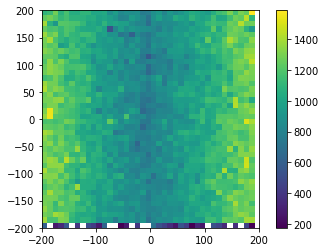

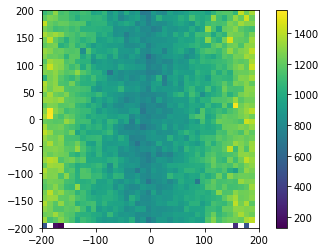

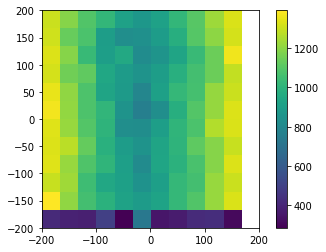

In [108]:
zlims = [200,300]

xy = np.zeros([nVoxx,nVoxy])
for x in range(nVoxx):
    for y in range(nVoxy):
        zstack = []
        for z in range(nVoxz):
            if (z >= zlims[0]*(nVoxz-1)/Lz) and (z <= zlims[1]*(nVoxz-1)/Lz):
                if (grid_nhits[x][y][z] > 0):
                    zstack.append(grid_dqdx[x][y][z] / grid_nhits[x][y][z] * 1.0)
        xy[x][y] = np.median(np.array(zstack))
        
xy12 = np.zeros([nVoxx12,nVoxy12])
for x in range(nVoxx12):
    for y in range(nVoxy12):
        zstack = []
        for z in range(nVoxz12):
            if (z >= zlims[0]*(nVoxz12-1)/Lz) and (z <= zlims[1]*(nVoxz12-1)/Lz):
                if (grid_nhits12[x][y][z] > 0):
                    zstack.append(grid_dqdx12[x][y][z] / grid_nhits12[x][y][z] * 1.0)
        xy12[x][y] = np.median(np.array(zstack))
                    
xy_sce = np.zeros([nVoxx,nVoxy])
for x in range(nVoxx):
    for y in range(nVoxy):
        zstack = []
        for z in range(nVoxz):
            if (z >= zlims[0]*(nVoxz-1)/Lz) and (z <= zlims[1]*(nVoxz-1)/Lz):
                if (grid_nhits_sce[x][y][z] > 0):
                    zstack.append(grid_dqdx_sce[x][y][z] / grid_nhits_sce[x][y][z] * 1.0)
        xy_sce[x][y] = np.median(np.array(zstack))
            
xy12_sce = np.zeros([nVoxx12,nVoxy12])
for x in range(nVoxx12):
    for y in range(nVoxy12):
        zstack = []
        for z in range(nVoxz12):
            if (z >= zlims[0]*(nVoxz12-1)/Lz) and (z <= zlims[1]*(nVoxz12-1)/Lz):
                if (grid_nhits12_sce[x][y][z] > 0):
                    zstack.append(grid_dqdx12_sce[x][y][z] / grid_nhits12_sce[x][y][z] * 1.0)
        xy12_sce[x][y] = np.median(np.array(zstack))
        
        
print(np.count_nonzero(xy_sce))
plt.imshow(xy.T, extent=[-200,200,-200,200])
plt.colorbar()
plt.show()
plt.imshow(xy_sce.T, extent=[-200,200,-200,200])
plt.colorbar()
plt.show()
plt.imshow(xy12.T, extent=[-200,200,-200,200])
plt.colorbar()
plt.show()

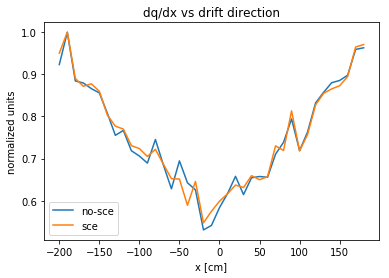

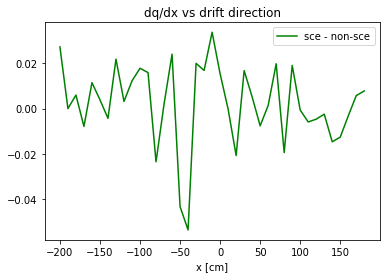

In [128]:
xx = []
yy = []
yy_sce = []
yy_diff = []

for x in range(nVoxx-1):
    xx.append((1.0*x/nVoxx*Lx)-200)
    yy.append(np.average(xy[x][int((nVoxy/2)-2):int((nVoxy/2)+2)]))
    yy_sce.append(np.average(xy_sce[x][int((nVoxy/2)-2):int((nVoxy/2)+2)]))
    
yy = np.array(yy)
yy = yy / np.max(yy)
yy_sce = np.array(yy_sce)
yy_sce = yy_sce / np.max(yy_sce)

yy_diff = list(yy_sce - yy)
yy_diff = yy_diff
yy = list(yy)
yy_sce = list(yy_sce)


plt.plot(xx,yy,label='no-sce')
plt.plot(xx,yy_sce,label='sce')
plt.title('dq/dx vs drift direction')
plt.xlabel('x [cm]')
plt.ylabel('normalized units')
plt.legend()
plt.savefig('dqdxvsdrift.png')
plt.show()

plt.plot(xx,yy_diff, color='g', label='sce - non-sce')
plt.title('dq/dx vs drift direction')
plt.xlabel('x [cm]')
plt.legend()
plt.savefig('dqdxvsdrift_diff.png')
plt.show()


In [75]:
for i,x in range(grid_dqdx.size[0]):
    for ii,y in range(grid_dqdx.size[1]):
        for iii,z in range(grid_dqdx.size[2]):
            plt.scatter()

1582906.771219658
2033531.9431808125


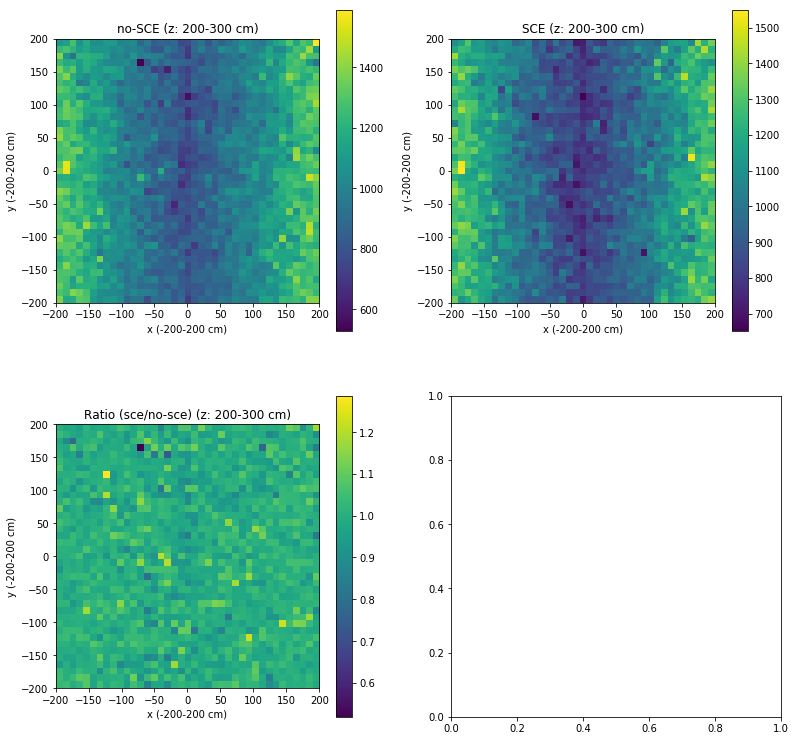

In [109]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(13,13)

#prep some data
xy_ratio = np.zeros([nVoxx,nVoxy])
for x in range(nVoxx):
    for y in range(nVoxy):
        if (xy[x][y] > 0) and (xy_sce[x][y] > 0):
            ratio = xy_sce[x][y]/xy[x][y]*1.0
            xy_ratio[x][y] = ratio
            
#just clean up some outliers
# for x in range(nVoxx):
#     for y in range(nVoxy):
#         if xy_ratio[x][y] > 50:
#             try:
#                 xy_ratio[x][y] = (xy_ratio[x+1][y] +xy_ratio[x-1][y] + xy_ratio[x][y+1] + xy_ratio[x][y-1])/4
#             except:
#                 xy_ratio[x][y] = 50
            

# for x in range(nVoxx):
#     for y in range(nVoxy):
#         if xy_sce[x][y] > 2000: #put a cut on z to make plots comparable
#             xy_sce[x][y] = 

#make plots
im1 = axes[0,0].imshow(xy.T[:39,:39], extent=[-200,200,-200,200])
axes[0,0].set_xlabel('x (-200-200 cm)')
axes[0,0].set_ylabel('y (-200-200 cm)')
axes[0,0].set_title('no-SCE (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(xy_sce.T[:39,:39], extent=[-200,200,-200,200])
axes[0,1].set_xlabel('x (-200-200 cm)')
axes[0,1].set_ylabel('y (-200-200 cm)')
axes[0,1].set_title('SCE (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im2, ax=axes[0,1])
# plt.savefig('dqdx_middle{}-{}_n10000.png'.format(zlims[0],zlims[1]))

im3 = axes[1,0].imshow(xy_ratio.T[:39,:39], extent=[-200,200,-200,200])
axes[1,0].set_xlabel('x (-200-200 cm)')
axes[1,0].set_ylabel('y (-200-200 cm)')
axes[1,0].set_title('Ratio (sce/no-sce) (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im3, ax=axes[1,0])

fig.savefig('dqdx4x4_z{}-{}_nVox{}-{}-{}_median_n10000.png'.format(zlims[0],zlims[1],nVoxx,nVoxy,nVoxz))

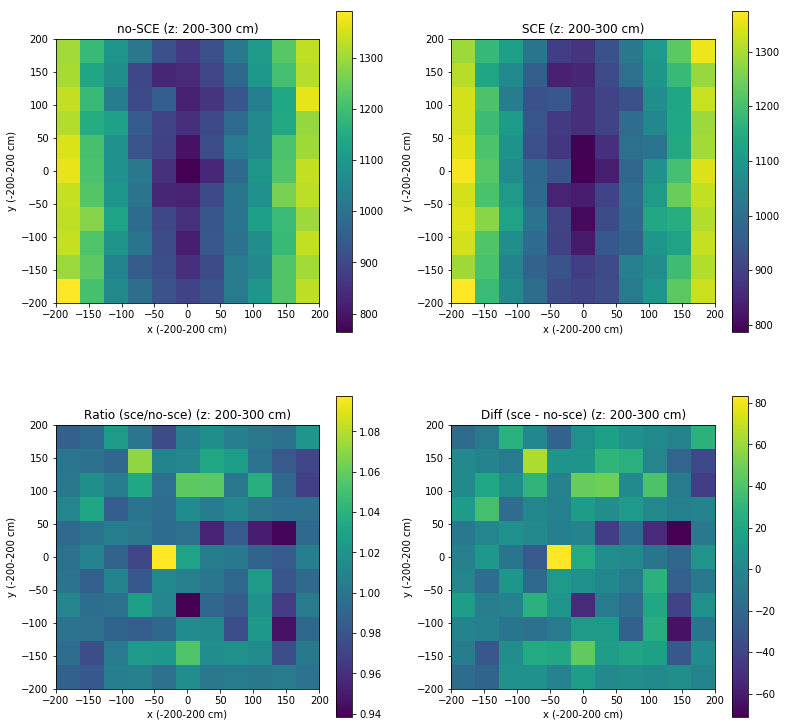

In [119]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(13,13)

#prep some data
xy_ratio12 = np.zeros([nVoxx12,nVoxy12])
xy_diff12 = np.zeros([nVoxx12,nVoxy12])
for x in range(nVoxx12-1):
    for y in range(nVoxy12-1):
        if (xy12[x][y] > 0) and (xy12_sce[x][y] > 0):
            ratio = xy12_sce[x][y]/xy12[x][y]*1.0
            xy_ratio12[x][y] = ratio
            diff = xy12_sce[x][y] - xy12[x][y]
            xy_diff12[x][y] = diff
            
            
#just clean up some outliers
# for x in range(nVoxx):
#     for y in range(nVoxy):
#         if xy_ratio[x][y] > 50:
#             try:
#                 xy_ratio[x][y] = (xy_ratio[x+1][y] +xy_ratio[x-1][y] + xy_ratio[x][y+1] + xy_ratio[x][y-1])/4
#             except:
#                 xy_ratio[x][y] = 50
            

# for x in range(nVoxx):
#     for y in range(nVoxy):
#         if xy_sce[x][y] > 2000: #put a cut on z to make plots comparable
#             xy_sce[x][y] = 

xy12_trim = xy12[:11,:11]
xy12__trimsce = xy12_sce[:11,:11]
xy_ratio12_trim = xy_ratio12[:11,:11]
xy_diff12_trim = xy_diff12[:11,:11]

#make plots
im1 = axes[0,0].imshow(xy12.T, extent=[-200,200,-200,200])
axes[0,0].set_xlabel('x (-200-200 cm)')
axes[0,0].set_ylabel('y (-200-200 cm)')
axes[0,0].set_title('no-SCE (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(xy12_sce.T, extent=[-200,200,-200,200])
axes[0,1].set_xlabel('x (-200-200 cm)')
axes[0,1].set_ylabel('y (-200-200 cm)')
axes[0,1].set_title('SCE (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im2, ax=axes[0,1])
# plt.savefig('dqdx_middle{}-{}_n10000.png'.format(zlims[0],zlims[1]))

im3 = axes[1,0].imshow(xy_ratio12_trim.T, extent=[-200,200,-200,200])
axes[1,0].set_xlabel('x (-200-200 cm)')
axes[1,0].set_ylabel('y (-200-200 cm)')
axes[1,0].set_title('Ratio (sce/no-sce) (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(xy_diff12_trim.T, extent=[-200,200,-200,200])
axes[1,1].set_xlabel('x (-200-200 cm)')
axes[1,1].set_ylabel('y (-200-200 cm)')
axes[1,1].set_title('Diff (sce - no-sce) (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im4, ax=axes[1,1])

fig.savefig('dqdx4x4_z{}-{}_nVox{}-{}-{}_median_n10000.png'.format(zlims[0],zlims[1],nVoxx12,nVoxy12,nVoxz12))

In [ ]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(13,13)

#prep some data
xy_ratio20 = np.zeros([nVoxx20,nVoxy20])
for x in range(nVoxx20):
    for y in range(nVoxy20):
        if (xy20[x][y] > 0) and (xy20_sce[x][y] > 0):
            ratio = xy20[x][y]/xy20_sce[x][y]*1.0
            xy_ratio20[x][y] = ratio
            
#just clean up some outliers
# for x in range(nVoxx):
#     for y in range(nVoxy):
#         if xy_ratio[x][y] > 50:
#             try:
#                 xy_ratio[x][y] = (xy_ratio[x+1][y] +xy_ratio[x-1][y] + xy_ratio[x][y+1] + xy_ratio[x][y-1])/4
#             except:
#                 xy_ratio[x][y] = 50
            

# for x in range(nVoxx):
#     for y in range(nVoxy):
#         if xy_sce[x][y] > 2000: #put a cut on z to make plots comparable
#             xy_sce[x][y] = 

xy20 = xy20[:19,:19]
xy20_sce = xy20_sce[:19,:19]
xy_ratio20 = xy_ratio20[:19,:19]

#make plots
im1 = axes[0,0].imshow(xy20.T, extent=[-200,200,-200,200])
axes[0,0].set_xlabel('x (-200-200 cm)')
axes[0,0].set_ylabel('y (-200-200 cm)')
axes[0,0].set_title('no-SCE (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(xy20_sce.T, extent=[-200,200,-200,200])
axes[0,1].set_xlabel('x (-200-200 cm)')
axes[0,1].set_ylabel('y (-200-200 cm)')
axes[0,1].set_title('SCE (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im2, ax=axes[0,1])
# plt.savefig('dqdx_middle{}-{}_n10000.png'.format(zlims[0],zlims[1]))

im3 = axes[1,0].imshow(xy_ratio20.T, extent=[-200,200,-200,200])
axes[1,0].set_xlabel('x (-200-200 cm)')
axes[1,0].set_ylabel('y (-200-200 cm)')
axes[1,0].set_title('Ratio (sce/no-sce) (z: {}-{} cm)'.format(zlims[0],zlims[1]))
fig.colorbar(im3, ax=axes[1,0])

fig.savefig('dqdx4x4_z{}-{}_nVox{}-{}-{}_median_n10000.png'.format(zlims[0],zlims[1],nVoxx,nVoxy,nVoxz))

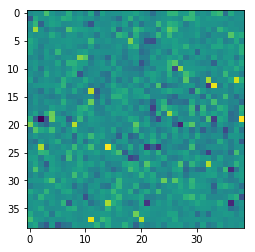

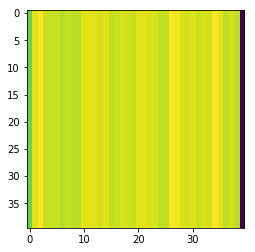

In [30]:
loaded_grid = np.loadtxt('griddqdx.txt')
loaded_grid_nhits = np.loadtxt('gridnhits.txt')
loaded_grid = loaded_grid.reshape(40,40,50)
loaded_grid_nhits = loaded_grid_nhits.reshape(40,40,50)

xy = [[0]*nVoxx]*nVoxy
for x in range(nVoxx):
    for y in range(nVoxy):
        for z in range(nVoxz):
            if (z > zlims[0]*(nVoxz-1)/Lz) and (z < zlims[1]*(nVoxz-1)/Lz):
                if (grid_nhits[x][y][z] > 0):
                    xy[x][y] += loaded_grid[x][y][z] / loaded_grid_nhits[x][y][z] * 1.0
                    
plt.imshow(xy)


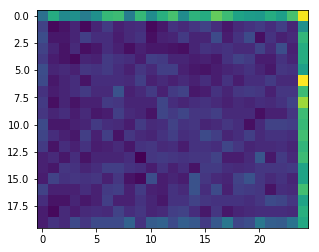

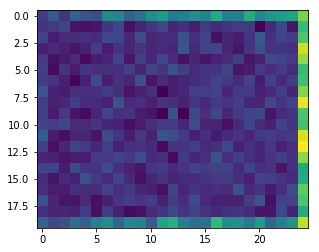

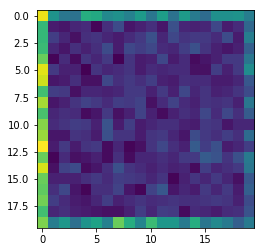

In [82]:
#maybe plot something?
for i,xyz in enumerate(grid_end):
    for ii,yz in enumerate(xyz):
        for iii,z in enumerate(yz):
            continue
            
#print(np.sum(grid_end, axis=0))   
plt.imshow(np.sum(grid_end, axis=0))
plt.show()
plt.imshow(np.sum(grid_end, axis=1))
plt.show()
plt.imshow(np.sum(grid_end, axis=2))
#print('\n-------------------------------------------------------\n')
#print(grid_end)

## What does the second index mean?

[307, 262, 318]


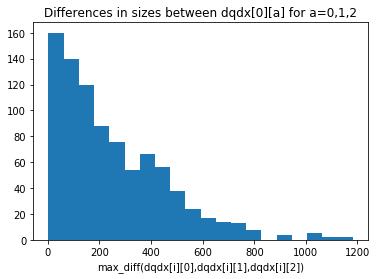

In [44]:
secondindex = [0,0,0]
deltas = []
nhits0 = []
nhits1 = []
nhits2 = []
for run,data in enumerate(anatree.iterate(["trkxyz_pandoraTrack","trkdqdx_pandoraTrack"])):
    for subrun,(xyz,dqdxs) in enumerate(zip(data[b'trkxyz_pandoraTrack'],data[b'trkdqdx_pandoraTrack'])):
        if (xyz.shape[0] == 1):
            count0,count1,count2 = np.count_nonzero(dqdxs[0][0]),np.count_nonzero(dqdxs[0][1]),np.count_nonzero(dqdxs[0][2])
            countmax = max(count0,count1,count2)
            
            #plot the max diff
            deltas.append(max([abs(count0-count1),abs(count0-count2),abs(count1-count2)]))
            #for plotting 
            nhits0.append(count0)
            nhits1.append(count1)
            nhits2.append(count2)
            
            if countmax == count0:
                secondindex[0] += 1
            elif countmax == count1:
                secondindex[1] += 1
            elif countmax == count2:
                secondindex[2] += 1
    if run > 1000:
        break

print(secondindex)
plt.hist(deltas, bins='auto')
plt.title('Differences in sizes between dqdx[0][a] for a=0,1,2')
plt.xlabel('max_diff(dqdx[i][0],dqdx[i][1],dqdx[i][2])')
plt.savefig('secondindexDeltas.png')
plt.show()

plt.hist(nhits0, bins)
            

## Follow a specific track and study calorimetry